<h1><b>UNICEF Take-Home Assignment</b></h1>

----

## Project Objective

<b>Scenario:</b>
<p>
UNICEF USA has recently launched a <u>digital marketing campaign</u> <u>aimed</u> at <u><b><i>increasing</i></b></u> <u>engagement</u> and <u>donations</u> from new and existing constituents. Your task is to analyze the campaign data, generate insights, and provide recommendations for future campaigns.</p>

<br>

<b>Tasks:</b>

1. <b><i>Data Analysis & Visualization</b></i>
- Analyze the provided campaign performance data to identify key trends and patterns.
- Create visualizations to effectively communicate your findings. Use any data visualization tool you are
comfortable with (e.g., PowerBI, Tableau, LookerStudio).

2. <b><i>Performance Evaluation</b></i>
- Evaluate the effectiveness of the campaign across different channels (paid, owned, and earned).
- Identify which audience segments were most responsive to the campaign.

3. <b><i>Insights & Recommendations</b></i>
- Based on your analysis, provide actionable insights that can help optimize future marketing campaigns.
- Suggest strategies for improving engagement and donation rates from new and existing constituents.

4. <b><i>Data Storytelling</b></i>
- Prepare a short presentation (5-7 slides) summarizing your analysis, key insights, and
recommendations.
- Ensure your presentation is clear, concise, and tailored for a non-technical audience.


<br>

<b>Dummy Data provided:</b>

1. <b><i>Campaign Performance Data</b></i> (campaign_performance_data): 
- - Includes metrics from paid, owned, and earned channels (e.g., impressions, clicks, conversions, engagement rates).
<br>
2. <b><i>Audience Segmentation Data</b></i> (audience_segmentation_data): 
- - Details about different audience segments targeted in the campaign (e.g., demographics, past engagement).

<br>

----
<p>This assignment aims to assess your ability in the following areas:</p>

1. <b><u>Data Analysis</b></u>: Accuracy and depth of your analysis.
2. <b><u>Visualization</b></u>: Clarity and effectiveness of your visualizations.
3. <b><u>Insights Development</b></u>: Relevance and actionability of your insights and recommendations.
4. <b><u>Communication</b></u>: Clarity and conciseness of your presentation and written explanations.

<p>
Please share your work via email as a PDF document or a shared link to an online presentation (e.g., Google Slides)
along with any supporting data files (e.g., Excel, CSV).</p>

----

In [107]:
# importing necessary packages to run code in this notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<b><i>color palette for visuals:</i><b>

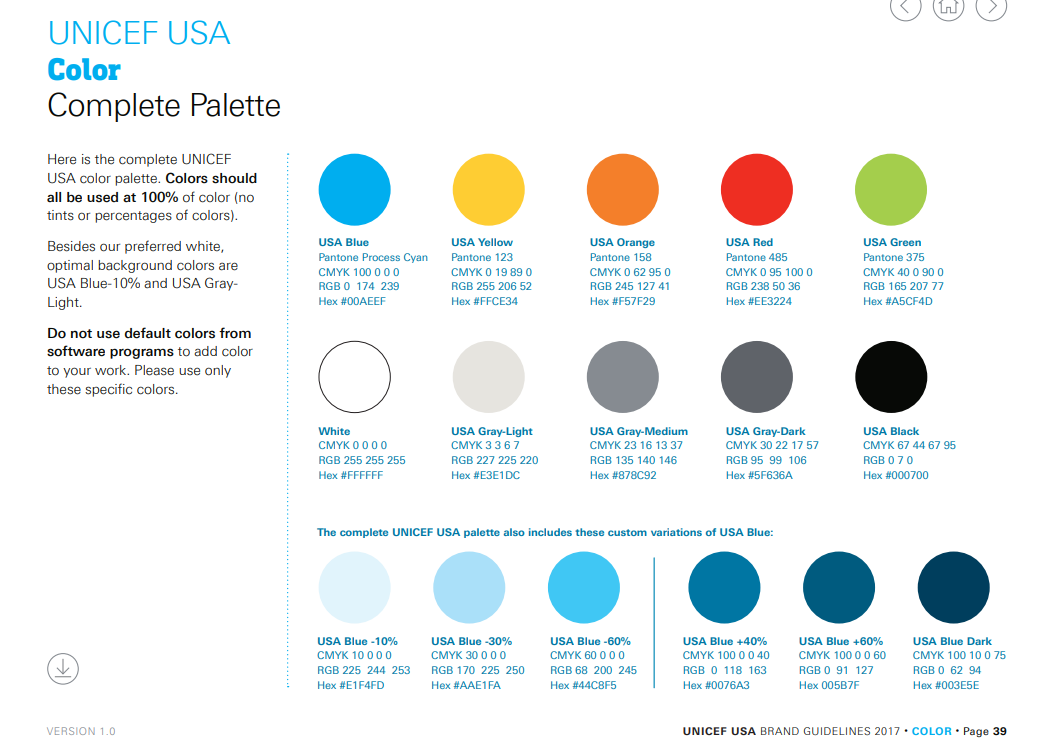

---

<h2>/audience_segmentation_data.csv</h2>

> - read and clean dataset

In [2]:
# read /audience_segmentation_data.csv file and storing it to the variable 'aud_seg' for the DataFrame


try:
    aud_seg = pd.read_csv('audience_segmentation_data.csv', sep=',') 
    print('The right path is audience_segmentation_data.csv')
except:
    aud_seg = pd.read_csv('/datasets/audience_segmentation_data.csv', sep=',') 
    print('The right path is /datasets/audience_segmentation_data.csv')

display(aud_seg)

The right path is audience_segmentation_data.csv


,Segment,Age_Group,Gender,Engagement_Level,Past_Engagement
0,New Donors,18-24,Male,Low,12
1,Existing Donors,25-34,Female,Medium,39
2,Potential Donors,35-44,Other,High,12
3,New Donors,45-54,Male,High,36
4,Existing Donors,55-64,Female,High,18
5,Potential Donors,65+,Other,Medium,23
6,New Donors,18-24,Male,Medium,26
7,Existing Donors,25-34,Female,High,28
8,Potential Donors,35-44,Other,Medium,30
9,New Donors,45-54,Male,Low,44


In [3]:
# obtain general information about data in audience_segmentation_data DataFrame (dtype of columns, non-null values, and memory usage)

aud_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Segment           30 non-null     object
 1   Age_Group         30 non-null     object
 2   Gender            30 non-null     object
 3   Engagement_Level  30 non-null     object
 4   Past_Engagement   30 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


aud_seg.info() notes:
> - all columns are objects expect for 'Past_Engagement'
> - there seems to be no missing values in any columns based on an overview for count of rows
> - column header is a combination of CamelCase and snake_case, renaming convention to snake_case for standard format

In [4]:
# rename column names to standardize format

aud_seg.rename(columns={'Segment': 'segment',
                        'Age_Group': 'age_group',
                        'Gender': 'gender',
                        'Engagement_Level': 'engagement_level',
                        'Past_Engagement': 'past_engagement'
                        }, inplace=True)


# display dataframe to see column name changes
display(aud_seg.head())

,segment,age_group,gender,engagement_level,past_engagement
0,New Donors,18-24,Male,Low,12
1,Existing Donors,25-34,Female,Medium,39
2,Potential Donors,35-44,Other,High,12
3,New Donors,45-54,Male,High,36
4,Existing Donors,55-64,Female,High,18


In [5]:
# validate there are no missing values in aud_seg dataset

print((aud_seg).isna().sum())

segment             0
age_group           0
gender              0
engagement_level    0
past_engagement     0
dtype: int64


> - no missing values in aud_seg confirmed

In [6]:
# identify if there are any duplicate values in aud_seg dataset

print(aud_seg.duplicated())
print()
print(f"total duplicate values: {aud_seg.duplicated().sum()}")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

total duplicate values: 0


> - no duplicate values in aud_seg confirmed

-----

<h2>/campaign_performance_data.csv</h2>

> - read and clean dataset

In [7]:
# read /campaign_performance_data.csv file and storing it to the variable 'cam_perf' for the DataFrame

try:
    cam_perf = pd.read_csv('campaign_performance_data.csv', sep=',') 
    print('The right path is campaign_performance_data.csv')
except: 
    cam_perf = pd.read_csv('/datasets/campaign_performance_data', sep=',')
    print('The right path is /datasets/campaign_performance_data')

display(cam_perf)

The right path is campaign_performance_data.csv


,Channel,Impressions,Clicks,Conversions,Engagement_Rate
0,Paid,5508,652,13,0.07
1,Owned,5173,543,41,0.20
2,Earned,2401,858,38,0.11
3,Paid,6285,586,46,0.06
4,Owned,7732,875,82,0.17
5,Earned,5101,836,35,0.16
6,Paid,3654,938,38,0.06
7,Owned,2450,960,90,0.08
8,Earned,2476,668,64,0.12
9,Paid,4882,151,72,0.18


In [8]:
# obtain general information about data in campaign_performance_data DataFrame (dtype of columns, non-null values, and memory usage)

cam_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Channel          30 non-null     object 
 1   Impressions      30 non-null     int64  
 2   Clicks           30 non-null     int64  
 3   Conversions      30 non-null     int64  
 4   Engagement_Rate  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


cam_perf.info() notes: 

> - 'Channel' is the only object in dataframe
> - 'Engagement_Rate' is a float dtype
> - there seems to be no missing values in any columns based on an overview for count of rows
> - column header is a combination of CamelCase and snake_case, renaming convention to snake_case for standard format
> - there seems to be no common columns between both dataframes

In [9]:
# rename column names to standardize format 

cam_perf.rename(columns={'Channel': 'channel',
                        'Impressions': 'impressions',
                        'Clicks': 'clicks',
                        'Conversions': 'conversions',
                        'Engagement_Rate': 'engagement_rate'
                        }, inplace=True)


# display dataframe to see column name changes
display(cam_perf.head())

,channel,impressions,clicks,conversions,engagement_rate
0,Paid,5508,652,13,0.07
1,Owned,5173,543,41,0.20
2,Earned,2401,858,38,0.11
3,Paid,6285,586,46,0.06
4,Owned,7732,875,82,0.17


In [10]:
# validate there are no missing values in cam_perf dataset

print((cam_perf).isna().sum())

channel            0
impressions        0
clicks             0
conversions        0
engagement_rate    0
dtype: int64


> - no missing values in cam_perf confirmed

In [11]:
# identify if there are any duplicate values in cam_perf dataset

print(cam_perf.duplicated())
print()
print(f"total duplicate values: {cam_perf.duplicated().sum()}")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

total duplicate values: 0


> - no duplicate values in cam_perf confirmed

----

In [12]:
# viewing clean dataframes

print('audience_segmentation_data.csv:')
display(aud_seg)

print('campaign_performance_data.csv:')
display(cam_perf)

audience_segmentation_data.csv:


,segment,age_group,gender,engagement_level,past_engagement
0,New Donors,18-24,Male,Low,12
1,Existing Donors,25-34,Female,Medium,39
2,Potential Donors,35-44,Other,High,12
3,New Donors,45-54,Male,High,36
4,Existing Donors,55-64,Female,High,18
5,Potential Donors,65+,Other,Medium,23
6,New Donors,18-24,Male,Medium,26
7,Existing Donors,25-34,Female,High,28
8,Potential Donors,35-44,Other,Medium,30
9,New Donors,45-54,Male,Low,44


campaign_performance_data.csv:


,channel,impressions,clicks,conversions,engagement_rate
0,Paid,5508,652,13,0.07
1,Owned,5173,543,41,0.20
2,Earned,2401,858,38,0.11
3,Paid,6285,586,46,0.06
4,Owned,7732,875,82,0.17
5,Earned,5101,836,35,0.16
6,Paid,3654,938,38,0.06
7,Owned,2450,960,90,0.08
8,Earned,2476,668,64,0.12
9,Paid,4882,151,72,0.18


----

<h2>Analyzing 'campaign_performance_data' To Identify Key Trends and Patterns.</h2>

The Goal: 
- Evaluate the effectiveness of the campaign across different channels

In [39]:
# No data dictionary provided for dataset
# Researched information about each column instead of making assumptions. 


# What is paid, owned, earned channels? 
#  - Paid, owned, and earned media are three types of marketing channels that can be used to promote a company or brand.
#  - These marketing channel strategies can help you reach your overarching marketing goals, boost revenue, and increase ROI.
#  - But, how can you use these channels to increase sales, drive growth, and build a good reputation?

# Paid = media a company PAYS to promote its content on external platforms (such as: social media, search engines, websites, televsion ads).
# Paid media can offer control and immediate results, but it won't be effective without strong owned media.

# Owned = media a company CREATES and CONTROLS through its own digital content (such as: it's own website, blog, email ads). 
# Owned media can be valuable, but it won't gain traction without other distribution channels.

# Earned = media OTHERS CREATE content about/for a company (such as: reviews, news stories, social media mentions, or media coverage). 
# Earned media can bring turst, authenticity, and credibility, but it can be challenging to control and scale because it's not created by the company.
# Generating earned media often requires strategic PR, influencer partnerships, and engaging with customers.

#source: https://mailchimp.com/resources/earned-media-vs-paid-media/?igaag=154664726859&igaat=&igacm=20637339549&igacr=687230856184&igakw=&igamt=&igant=g&ds_c=DEPT_AOC_Google_Search_US_EN_NB_Acquire_Broad_DSA-Rsrc_US&ds_kids=p78250621731&ds_a_lid=dsa-2227026702184&ds_cid=71700000115207178&ds_agid=58700008574686663&gad_source=1&gclid=Cj0KCQjwwae1BhC_ARIsAK4JfrwOYgWVPasyEnOl6rrYGAo8jmtqwYxYKdkcIiLVjPfHPqRw3CLw0YkaAnEvEALw_wcB&gclsrc=aw.ds

In [38]:
# No data dictionary provided for dataset
# Researched information about each column instead of making assumptions. 


# What are impressions? 
#  - When a user sees an advertisement, not to be confused with engagement. 
#  - Impression = exposure to ad
#  - Impressions are important because they provide a simple representation of how many people are seeing ads within a particular channel.
#  - Calculating the number of impressions a campaign generates is also one of the simplest ways to ascertain how far an advertising channel really reaches.
#source: https://www.adjust.com/glossary/impression/


# What are clicks? 
#  - A metric that counts how often a user interacts with an advertisement to be taken to a specific site for a specific reason.
#  - Clicks are one of the most effective and accurate methods because an individual clicking on an advertisement indicates expressed interest. 
#  - Each metric helps marketers gauge how well their advertising works and what audiences respond to specific advertisements.
#source: https://www.klipfolio.com/resources/kpi-examples/digital-marketing/ad-clicks-vs-ad-impressions


# What are conversions? 
#  - The act of turning a prospect or visitor into a paying customer, subscriber, or lead.
#  - When a user performs a desired action in response to a call-to-action (CTA) placed in an ad.
#  - A conversion, also known as a conversion event, could be a download, install, sign-up, or purchase, among other actions for example.
#  - Marketers measure their conversions to assess the performance of a campaign or advertising channel or the impact of a change to the user experience.
#source: https://www.adjust.com/glossary/conversion/


# What is an engagement rate and how is it calculated? 
#  - A measure of how many people interact with specific content.
#  - Engagement Rate is not just a number; it's a reflection of the audience's connection to a brand.
#  - Calculated by dividing the total number of engagements by the total number of followers, and then multiplying by 100%. (Engagement Rate = Total Engagement / Total Followers x 100%)
#  - Total engagement is the sum of all interactions & Total followers is the number of people who follow the account. 
#source: https://agencyanalytics.com/kpi-definitions/engagement-rate


channel
Paid      10
Owned     10
Earned    10
Name: count, dtype: int64


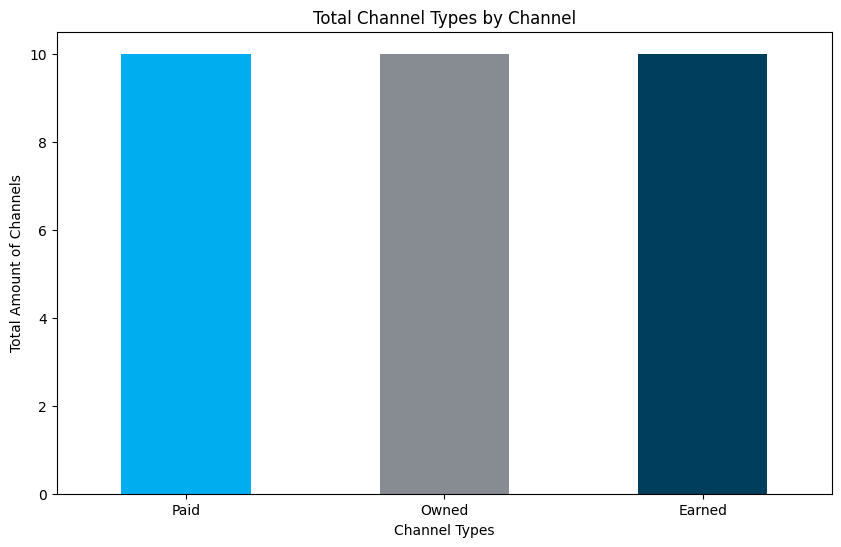

In [93]:
# What is the total metric of each category in 'channel'? 


# Counting the total number of each channel type
channel_counts = cam_perf['channel'].value_counts()
print(channel_counts)


# Plot
plt.figure(figsize=(10, 6))
channel_counts.plot(kind='bar', color=['#00AEEF', '#878C92', '#003E5E'])
plt.title('Total Channel Types by Channel')
plt.xlabel('Channel Types')
plt.xticks(rotation=0)
plt.ylabel('Total Amount of Channels')

plt.show()

> - There is an equal number of channels for each channel type.
> - The equal distribution of each channel type ensures that the data remains unbiased in terms of correlation. No single channel type dominates over the others. 

channel
Earned    54615
Owned     56898
Paid      58221
Name: impressions, dtype: int64


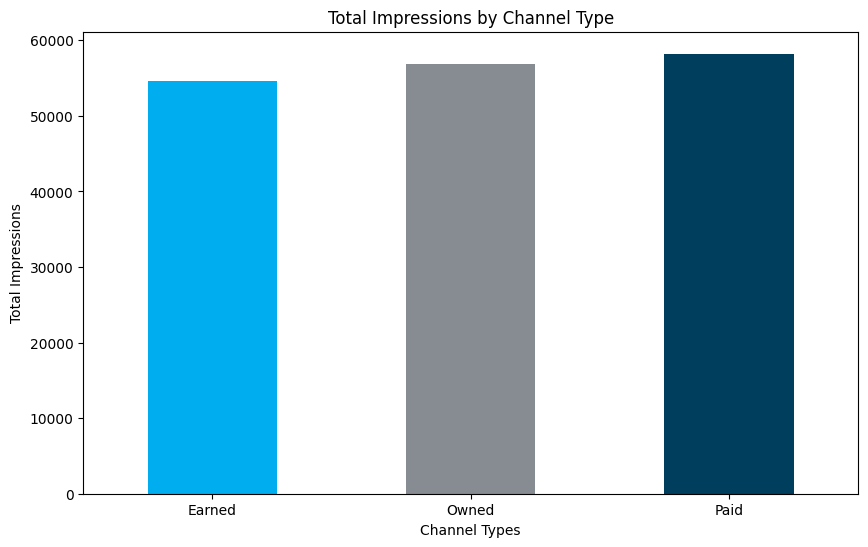

In [94]:
# What is the total metric of 'impressions' in each channel type?


# Finding total number of impressions in each channel type
impression_totals = cam_perf.groupby('channel')['impressions'].sum()
print(impression_totals)


# Plot
plt.figure(figsize=(10, 6))
impression_totals.plot(kind='bar', color=['#00AEEF', '#878C92', '#003E5E'])
plt.title('Total Impressions by Channel Type')
plt.xlabel('Channel Types')
plt.xticks(rotation=0)
plt.ylabel('Total Impressions')

plt.show()


> - Paid generates the most impressions, followed by Owned. 
> - Earned has the least amount of impressions, comparatively. 

channel
Earned    6275
Owned     6566
Paid      4957
Name: clicks, dtype: int64


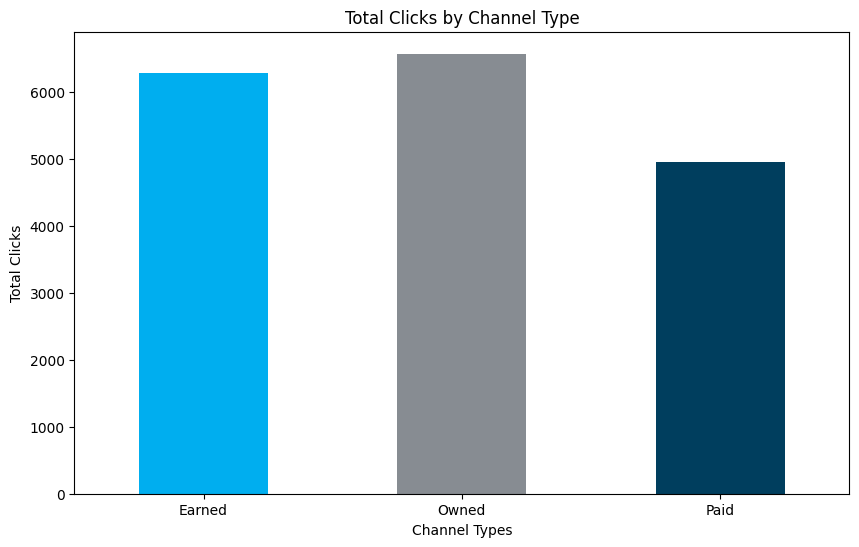

In [95]:
# What is the total metric of 'clicks' in each channel type?


# Finding the total number of clicks in each channel type
click_totals = cam_perf.groupby('channel')['clicks'].sum()
print(click_totals)


# Plot
plt.figure(figsize=(10, 6))
click_totals.plot(kind='bar', color=['#00AEEF', '#878C92', '#003E5E'])
plt.title('Total Clicks by Channel Type')
plt.xlabel('Channel Types')
plt.xticks(rotation=0)
plt.ylabel('Total Clicks')

plt.show()


> - Owned generated the most clicks, followed by Earned. 
> - Paid has the least amount of clicks, comparatively. 

> <b>Correlation between <u>Impressions</u> and <u>Clicks</u> data:</b>
> - Impressions help get a product greater exposure to a larger market; clicks measure how well that engagement converts to active interaction.
> - Although there are more Impressions for Paid, it generated the least amount of Clicks. 
> - Whereas, Earned has the least amount of Impressions but it generated the most amount of Clicks.

channel
Earned    598
Owned     633
Paid      597
Name: conversions, dtype: int64


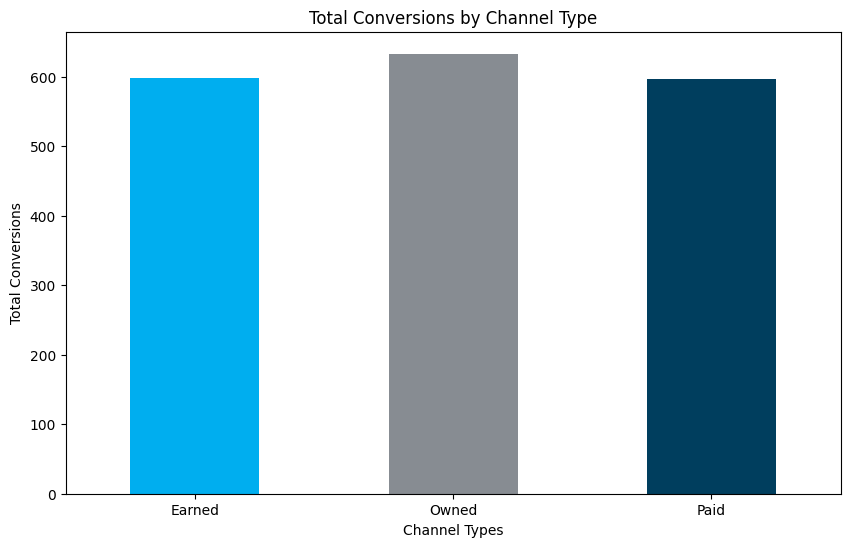

In [96]:
# What is the total metric of 'conversions' for each channel type? 


# Finding the total number of conversions for each channel type
conversion_totals = cam_perf.groupby('channel')['conversions'].sum()
print(conversion_totals)


# Plot
plt.figure(figsize=(10, 6))
conversion_totals.plot(kind='bar', color=['#00AEEF', '#878C92', '#003E5E'])
plt.title('Total Conversions by Channel Type')
plt.xlabel('Channel Types')
plt.xticks(rotation=0)
plt.ylabel('Total Conversions')

plt.show()

> - Owned has the highest amount of conversions. 
> - Paid has the least amount of conversions, comparatively.

> <b>Correlation between <u>Conversions</u> and <u>Clicks</u> data:</b>
> - Conversions assess the performance of a campaign advertising channel based on the prospect of turning a visitor into a paying customer or subscriber. 
> - The more clicks, the more conversions. 

channel
Earned    0.97
Owned     1.15
Paid      0.92
Name: engagement_rate, dtype: float64


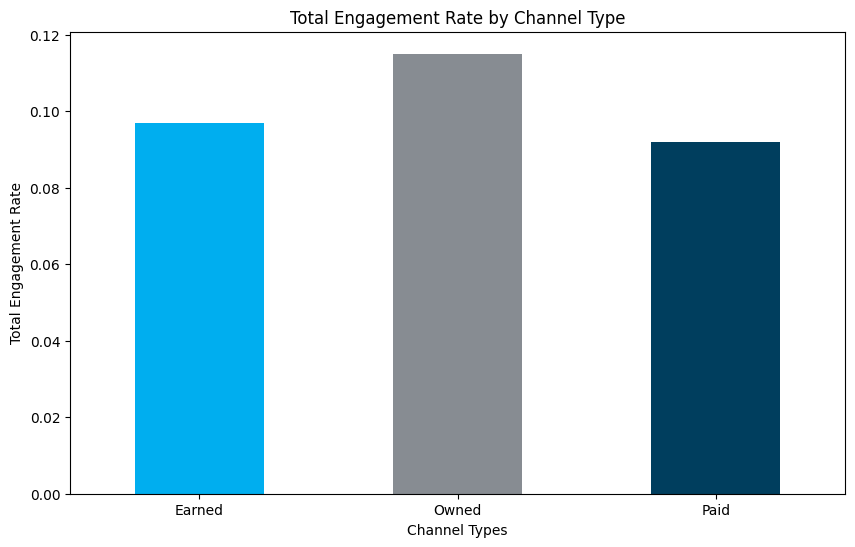

In [135]:
# What is the average metric of 'engagement rate' for each channel type? 


# Finding the average engagment rate for each channel type
engagement_total = cam_perf.groupby('channel')['engagement_rate'].mean()
print(engagment_total)

# Plot
plt.figure(figsize=(10, 6))
engagement_total.plot(kind='bar', color=['#00AEEF', '#878C92', '#003E5E'])
plt.title('Total Engagement Rate by Channel Type')
plt.xlabel('Channel Types')
plt.xticks(rotation=0)
plt.ylabel('Total Engagement Rate')

plt.show()

> - Owned has the highest engagement rate. 
> - Paid has the lowest engagement rate, comparatively. 

> <b>Correlation between <u>Engagement Rate</u> and <u>Conversions</u> data:</b>
> - A measure of how many people interact with specific content. 
> - The more conversions, the higher the engagement rate. 

<b>Overall Results of Analysis:</b> 
- The Owned channel achieves the highest engagement rate, conversions, and clicks, despite not having the most or fewest impressions.
- The Paid channel, despite having the most impressions, records the lowest engagement rate, conversions, and clicks.
- The Earned channel, has the fewest impressions but maintains moderate levels of engagement rate, conversions, and clicks.

<b>Conclusion:</b>

<p>This dataset provides valuable insights into the effectiveness of the marketing campaigns. The Owned channel proves to be the most effective, the Paid channel the least effective, and the Earned channel shows moderate effectiveness. </p>


Additionally, the engagement rate is a pivotal KPI that connects to the other key performance indicators.
- A higher engagement rate leads to more clicks and conversions. 
- Engagement rate also plays a role in the financial aspect of advertising campaigns - a higher engagment rate can result in lower Customer Acquisition Costs (CAC) which will improve the Return on Investment (ROI). 
- This scenerio does not occur in this data, but if there were an instance where the engagement rate is high but conversions are low, it may signal that while the content of the advertisement is compelling, it is not effective enough to move users through the sales funnel or the content of the ad is resonating with the wrong target audience.


If more data can be collected or provided:
- <b>Conversion Rate:</b> We can calculate the conversion rate (number of conversions / total number of visitors or interactions * 100) to better understand the Customer Acquisition Cost (CAC) and further measure the success of each campaign channel.
- <b>Return on Ad Spend (ROAS):</b> Determining ROAS would enable us to measure how many users convert due to the ad spend, which then can be used to set ROI expectations and targets when scaling a campaign.
- <b>Temporal Analysis:</b> If datetime data were provided, we could analyze KPIs over time to indentify when target audiences are most responsive and optimize campaign timings. 
- <b>Demographic Insights:</b> With demographic data such as geographic information, we could evaluate which states or locations are most effective for running campaigns. 

----

<h2>Analyzing 'audience_segmentation_data' To Identify Key Trends and Patterns.</h2>

The Goal: 
- Identify which audience segments were the most reponsive to the campaign. 

In [137]:
# no data dictionary provided for dataset
# Researched information about each column instead of making assumptions. 


# What is segment? 
#  - Aggregating prospective buyers into groups or segments, based on demographics, geography, behavior, or other factors, to better understand and market to them.
#  - Segmentation is important because it strives to make a company's marketing endeavors more strategic and refined. 
#  - By developing specific plans for specific products with target audiences in mind, a company can increase its chances of generating sales and being more efficient with resources.
#source: https://www.investopedia.com/terms/m/marketsegmentation.asp#:~:text=Market%20segmentation%20is%20a%20marketing,that%20appeals%20to%20their%20interests.


# What is age group?
#  - Age demographic segmentation 
#  - Could be used to identify their target demographic
#  - People in these age groups were born around the same time, they are likely to have grew up with shared experiences and usually share some of the same buying behaviors. 
#  - Each age groups can have their own spending habits, and they could also respond differently to advertisements compared to another age group.
#source: https://www.experian.com/marketing/resources/audience/demographic-segmentation#:~:text=Marketers%20use%20age%20segmentation%20to,middle%2Daged%2C%20and%20seniors.


# What is gender?  
#  - Gender demographic segmentation
#  - Could be used to identify their target demographic
#  - Different genders have distinct likes, thoughts, and preferences
#  - However, it is crucial for marketers to avoid delivering marketing messages based on stereotypes when using gender-based segmentation -- these types of advertisements can turn off or even anger your target market if done insensitively. 
#source: https://www.experian.com/marketing/resources/audience/demographic-segmentation#:~:text=Marketers%20use%20age%20segmentation%20to,middle%2Daged%2C%20and%20seniors.


# What is engagement level? 
#  - A metric that measures how much a customer or group of customers interact with a brand.
#  - Customer engagement is a key indicator of the brand’s performance. 
#  - When consumers are highly engaged with the brand, they’re more likely to purchase from that business or recommend the business to another consumer. 
#  - Low engagement levels, however, can signal that the consumer is likely to leave the brand for another company.
#source: https://www.salsify.com/glossary/engagement-levels-meaning#:~:text=Engagement%20levels%20are%20the%20metrics,indicator%20of%20the%20brand's%20performance.


# What is past engagment and what do the data values mean? 
#  - Collection of information on the interactions between a customer and a brand.
#  - Metric that quantifies an individual's overall level of engagement based on various activities or interactions, where higher scores indicate more engagement.
#source: https://segmentify.com/glossaries/engagement-data/#:~:text=Engagement%20data%20is%20the%20collected,20%20March%
### 
# EDIT: after conducting an analysis with the data, the inital research of what "past_engagement" represents might be wrong. 
#       - There are discrepancies where the same value in "past_engagement" indicates different levels of engagement in the "engagement_level" column. 
#       - Could the value of "past_engagement" indicate the number of donors in past campaigns? Would that also mean that each row of data in the dataset does not represent one donor?
#       - Sent email to >>mchoi@unicefusa.org<< to ask for clarification on data
#       - Waiting for response, in the meantime going to make an assumption that the value of "past_engagment" indicates the number of donors in past campaigns to therefore be able to continue conducting an analysis. 

segment
New Donors          10
Existing Donors     10
Potential Donors    10
Name: count, dtype: int64


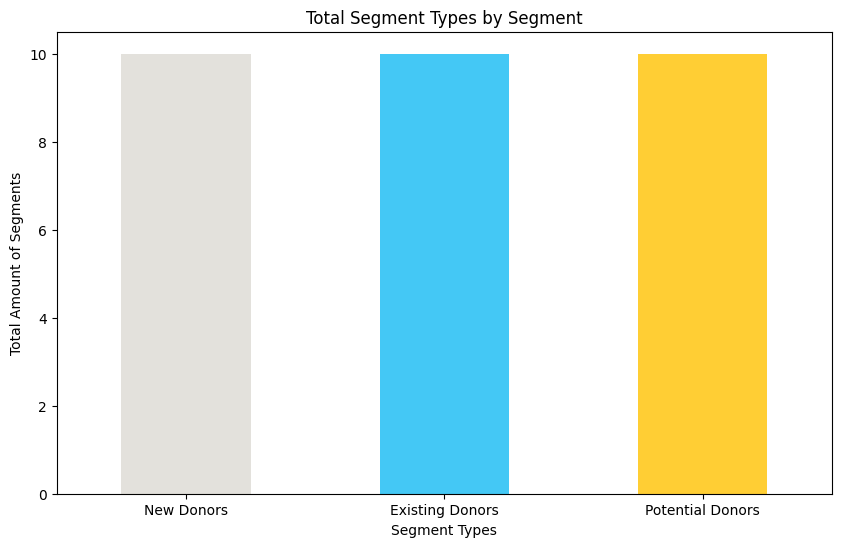

In [91]:
# What is the total metric of each category in 'segment'? 


# Counting the total number of each segment type
segment_counts = aud_seg['segment'].value_counts()
print(segment_counts)

# Plot
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['#E3E1DC','#44C8F5', '#FFCE34'])
plt.title('Total Segment Types by Segment')
plt.xlabel('Segment Types')
plt.xticks(rotation=0)
plt.ylabel('Total Amount of Segments')

plt.show()

> - There is an equal number of segments for each segment type.
> - The equal distribution between each segment type means that the data remains unbiased in terms of correlation. No single segment type dominates over the others. 

            segment age_group  count
0   Existing Donors     25-34      5
1   Existing Donors     55-64      5
2        New Donors     18-24      5
3        New Donors     45-54      5
4  Potential Donors     35-44      5
5  Potential Donors       65+      5


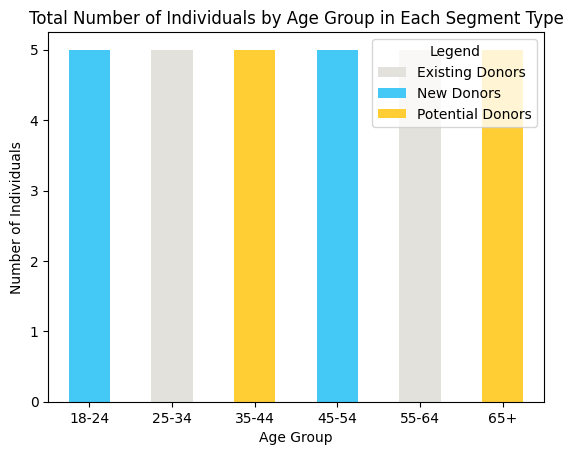

In [123]:
# What age groups make up each segment type? 
# What are the total metrics for 'age_group' in each segment type? 


# Counting total occurances for each age group in each segment type
age_group_counts = aud_seg.groupby(['segment', 'age_group']).size().reset_index(name='count')
print(age_group_counts)

# Pivot the dataframe to make it easier to plot
pivot_age = age_group_counts.pivot(index='age_group', columns='segment', values='count').fillna(0)

# Plot
pivot_age.plot(kind='bar', stacked=True, color=['#E3E1DC', '#44C8F5', '#FFCE34'], ax=plt.gca())
plt.title('Total Number of Individuals by Age Group in Each Segment Type')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Number of Individuals')
plt.legend(title='Legend')

plt.show()


> - The individuals in each age group are equally distributed across each segment.
> - This balanced distribution prevents bias in correlations because no single age group dominates over the other. 
> - There are no individuals in specific segments that overlap in age groups. 
> - New Donors are only in age groups 18-24 and 45-54
> - Existing Donors are only in age groups 25-34 and 55-64
> - Potential Donors are only in age groups 35-44 and 65+

In [126]:
# What genders make up each segment type? 
# What are the total metrics for 'gender' in each segment type? 


# Counting total occurances for each gender in each segment type
gender_count = aud_seg.groupby(['segment', 'gender']).size().reset_index(name='count')
print(gender_count)


            segment  gender  count
0   Existing Donors  Female     10
1        New Donors    Male     10
2  Potential Donors   Other     10


> - This result is showing that only one gender correlates to one type of segment
> - There is no overlap again and same number of individuals...validate further to double check if there was a mistake

In [130]:
# Validating further that only one gender correlates to one segment type and confirm why other genders are not in other segments. 



# Filter the DataFrame to include only females
females_df = aud_seg[aud_seg['gender'] == 'Female']

# Group by 'segment' and count the number of females in each segment
female_counts_by_segment = females_df.groupby('segment').size().reset_index(name='count')
print(female_counts_by_segment)


           segment  count
0  Existing Donors     10


> - confirming 'Female' only shows in Existing Donors and not other segments

In [131]:
# Filter the DataFrame to include only males
males_df = aud_seg[aud_seg['gender'] == 'Male']

# Group by 'segment' and count the number of females in each segment
male_counts_by_segment = males_df.groupby('segment').size().reset_index(name='count')
print(male_counts_by_segment)

      segment  count
0  New Donors     10


> - confirming 'Male' only shows in New Donors and not other segments

In [133]:
# Filter the DataFrame to include only others
others_df = aud_seg[aud_seg['gender'] == 'Other']

# Group by 'segment' and count the number of females in each segment
others_counts_by_segment = others_df.groupby('segment').size().reset_index(name='count')
print(others_counts_by_segment)

            segment  count
0  Potential Donors     10


> - confirming 'Other' only shows in Potential Donors and not other segments

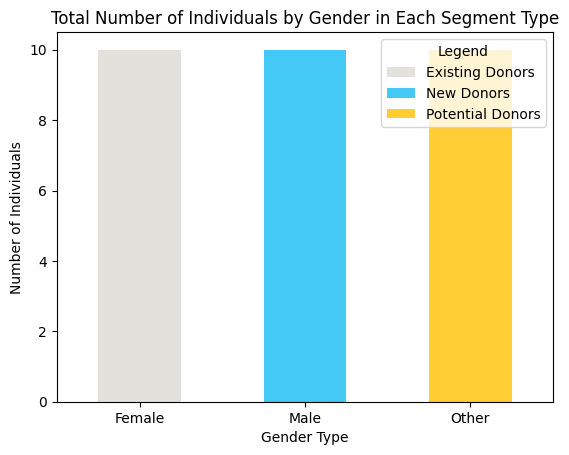

In [127]:
# Plot Gender in Each Segment Type
# Pivot the dataframe to make it easier to plot
pivot_gender = gender_count.pivot(index='gender', columns='segment', values='count').fillna(0)


# Plot
pivot_gender.plot(kind='bar', stacked=True, color=['#E3E1DC', '#44C8F5', '#FFCE34'], ax=plt.gca())
plt.title('Total Number of Individuals by Gender in Each Segment Type')
plt.xlabel('Gender Type')
plt.xticks(rotation=0)
plt.ylabel('Number of Individuals')
plt.legend(title='Legend')

plt.show()

> - The individuals in each gender type are equally distributed across each segment type.
> - This balanced distribution prevents bias in correlations because no single gender dominates over the other. 
> - There are no individuals in specific gender categories that overlap in segment types. 
> - Only 'Female' make up Existing Donors
> - Only 'Male' make up New Donors
> - Only 'Other' make up Potential Donors

In [156]:
# (note to self): after conducting an analysis this far with the aud_seg data, the results being produced does not seem right... 
#   - there is no value in columns to aggregate to find how many donors in each age_group, gender, or engagement_level besides utilizing the count method. (assuming each row of data represents one donor)
#   - the inital research of what "past_engagement" represents might be wrong because:
#           - There are discrepancies where the same value in "past_engagement" indicates different levels of engagement in the "engagement_level" column. 
#           - Could the value of "past_engagement" indicate the number of donors in past campaigns? 
#           - That would also mean that each row of data in the dataset does not represent one donor?
#   - Sent email to >> mchoi@unicefusa.org << to ask for clarification on data
#   - Waiting for response, in the meantime, going to make an assumption that the value of "past_engagment" indicates the number of donors in past campaigns to therefore be able to continue conducting an analysis. 

<i>Given that the results being produced does not seem right and there are no clear values to aggregate besides assuming that each row represents one donor. 
Additionally, despite initial research suggesting a correlation, "past_engagement" value does not seem to indicate "engagement_level". 
Therefore, I am making an assumption that the value of "past_engagement" indicates the number of donors in past campaigns. 
This assumption will allow me to be able to continue an analysis while awaiting clarification on the data.</i>

segment
Existing Donors     220
New Donors          260
Potential Donors    177
Name: past_engagement, dtype: int64


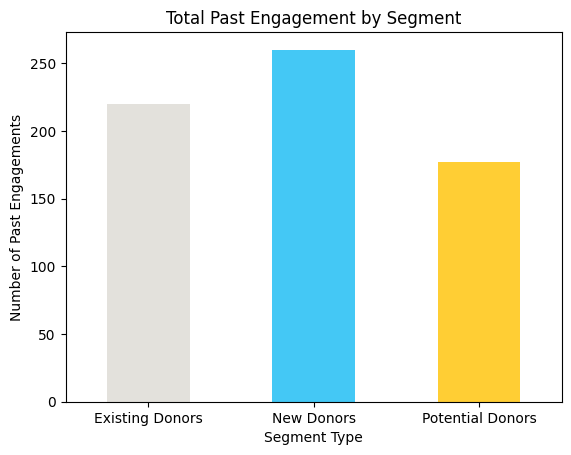

In [147]:
# What are the total metrics for 'segment' using past engagement?

# Finding the total number of past engagements for each segment
segment_total = aud_seg.groupby('segment')['past_engagement'].sum()
print(segment_total)

# Plot
segment_total.plot(kind='bar', stacked=True, color=['#E3E1DC', '#44C8F5', '#FFCE34'])
plt.title('Total Past Engagement by Segment')
plt.xlabel('Segment Type')
plt.xticks(rotation=0)
plt.ylabel('Number of Past Engagements')

plt.show()

> - New Donors has the highest amount of donors in past engagements
> - Potential Donors has the least amount of donors in past engagements

age_group
18-24    136
25-34    108
35-44    112
45-54    124
55-64    112
65+       65
Name: past_engagement, dtype: int64


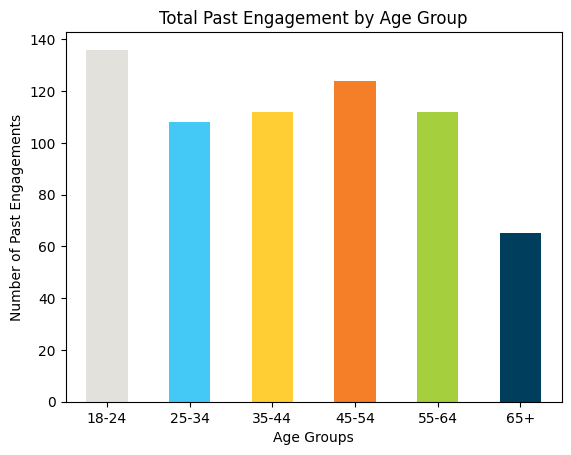

In [149]:
# What are the total metrics for 'age_group' using past engagement?

# Finding the total number of past engagements for each age group
age_total = aud_seg.groupby('age_group')['past_engagement'].sum()
print(age_total)

# Plot
age_total.plot(kind='bar', stacked=True, color=['#E3E1DC', '#44C8F5', '#FFCE34', '#F57F29', '#A5CF3D', '#003E5E']) 
plt.title('Total Past Engagement by Age Group')
plt.xlabel('Age Groups')
plt.xticks(rotation=0)
plt.ylabel('Number of Past Engagements')

plt.show()

> - age group 18-24 has the highest amount of donors in past engagements
> - age group 65+ has the least amount of donors in past engagements

gender
Female    220
Male      260
Other     177
Name: past_engagement, dtype: int64


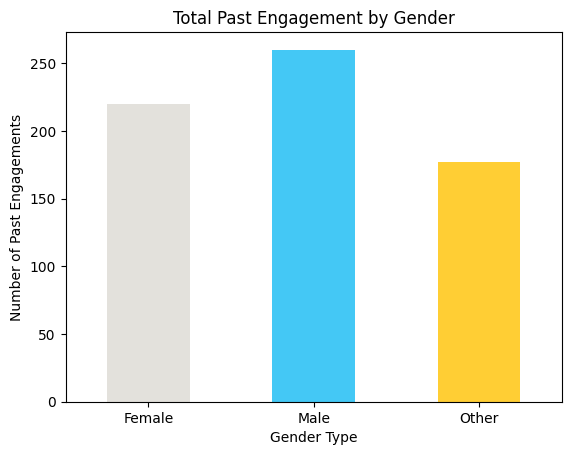

In [151]:
# What are the total metrics for 'gender' in each past engagement?

# Finding the total number of past engagements for each gender
gender_total = aud_seg.groupby('gender')['past_engagement'].sum()
print(gender_total)

# Plot
gender_total.plot(kind='bar', stacked=True, color=['#E3E1DC', '#44C8F5', '#FFCE34'])
plt.title('Total Past Engagement by Gender')
plt.xlabel('Gender Type')
plt.xticks(rotation=0)
plt.ylabel('Number of Past Engagements')

plt.show()

> - Male has the highest amount of donors in past engagements
> - Other has the lowest amount of donors in past engagements

engagement_level
High      249
Low       188
Medium    220
Name: past_engagement, dtype: int64


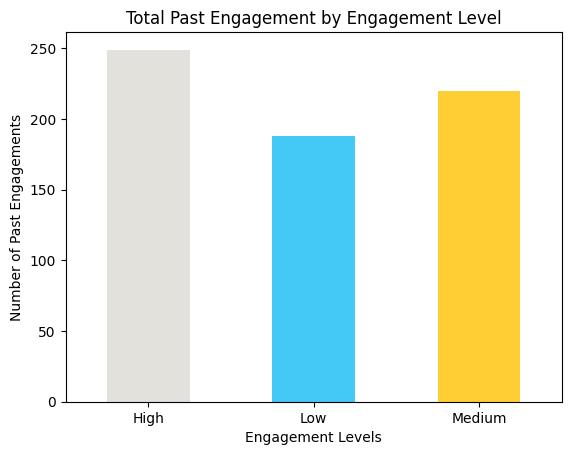

In [154]:
# Which are the total metrics for 'engagement_level' in each past engagement?

# Finding the total number of past engagements for each engagement level
level_total = aud_seg.groupby('engagement_level')['past_engagement'].sum()
print(engagement_total)

# Plot
level_total.plot(kind='bar', stacked=True, color=['#E3E1DC', '#44C8F5', '#FFCE34'])
plt.title('Total Past Engagement by Engagement Level')
plt.xlabel('Engagement Levels')
plt.xticks(rotation=0)
plt.ylabel('Number of Past Engagements')

plt.show()

> - high engagement levels has the highest amount of donors in past engagement
> - low engagement levels has the lowest amount of donors in past engagement

<b>Overall Results of Analysis:</b> 
- <b>Most Responsive:</b> New donors, males, age group 18-24, and those with high engagement levels were the most responsive to the campaign based on past engagements.
- <b>Least Responsive:</b> Potential donors, those who identify as other for gender, individuals aged 65+, and those with low engagement levels were the least responsive.
- <b>Moderately Responsive:</b> Existing donors, females, individuals aged 25-64, and those with medium engagement levels showed a moderate response to the campaign.
 

<b>Conclusion:</b>

<p>This dataset provides valuable insights into which audiences are more responsive to marketing campaigns. The most responsive groups are donors with high engagement levels, new donors, males, and individuals aged 18-24. To maximize campaign effectiveness, efforts should be focused on targeting these specific segments.</p>

If more data can be collected or provided:
- These points could provide deeper insights into donor behavior and characteristics
- <b>Regional Insights:</b> Detailed geographic information about donors could reveal regional trends in responsiveness. 
- <b>Financial Analysis:</b> Information on income brackets of donors could help to understand their financial capabilities and spending behavior.
- <b>Education Insights:</b> Information on the education levels of donors could indicate if certain degrees correlate with higher responsiveness to campaigns.
- <b>Occupation Insights:</b> Information of donors' occupation could help in understanding their interests 
- <b>Donation History:</b> Details on past donations, including frequency, amount, and recency, could help identify readiness to donate again and gauge responsiveness levels.
- <b>Campaign Timing:</b> Data on response times, such as day of the week, time of day, or season, could enhance the timing of responsiveness to campaigns.
- <b>Incentive Insights:</b> Information on which incentives (e.g., thank-you gifts) lead to better responses can inform campaign strategies.
- <b>Donor Feedback:</b> Direct feedback from donors via surveys or forms can reveal their preferences and improve engagement strategies.


In [155]:
# is there a correlation between gender and age group to what kind of donors we are getting?